In [4]:
%load_ext autoreload
%autoreload 2

import smart_import
import numpy as np
import matplotlib.pyplot as plt

from quanalys.acquisition_notebook import AcquisitionNotebookManager

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# AcquisitionManager and AnalysisManager

In [5]:
aqm = AcquisitionNotebookManager("tmp_data/")
# Creates (or loads) the temporary json file ...\measurements\Cooldown_2022_12_12_die5_Gflux_22_CEA_v1\\quanalysis_tmp.json

aqm.set_config_file(["dummy_config1.txt", "dummy_config2.txt"])
# A snapshot of all files in this list will be backed-up with the data.

# Example 1: acquisition with a blocking function

In [38]:
%%acquisition_cell simple_sine
# The code contained in this cell should be backed-up as it defines how the data are acquired:
# A snapshot of the content of this cell is registered at the execution time, for future backup

def acquire_data():
    x = np.linspace(0, 20*np.pi, 101)
    y = np.sin(x)
    return x, y

x, y = acquire_data()

aqm.save_acquisition(x=x, y=y) # Nothing can be done until the dataset is fully acquired, so in this case, the data are saved in a .h5 file, 
# and the content of this cell as well

analysis_cell


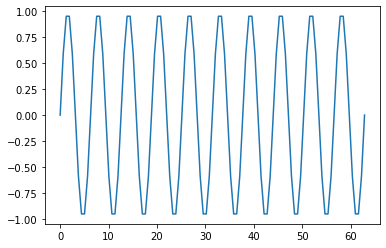

In [39]:
%%analysis_cell

fig = plt.figure()
plt.plot(aqm.data.x, aqm.data.y)

aqm.save_fig(fig)
## when aqm.save_fig is called:
## 1. the figure will be save in pdf in the acquisition folder (eventually the previous version 
## will be overwriten if no new name is provided).
## 2. The current analysis_cell will be saved (eventually overwritten) in the acquisition folder


# Example 2: acquisition with a standalone platform (e.g. Quantum Machine)

In [40]:
%%acquisition_cell sine_qm

# The code contained in this cell is important as it defines how the data are acquired.

def fetch_new_data():
    """
    This code mimics 
    """
    x = np.linspace(0, 20*np.pi, 101)
    y = np.sin(x)
    return x, y + np.random.random(len(x))

#submit job to the quantum machine if needed

analysis_cell


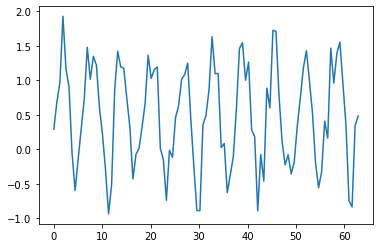

In [41]:
%%analysis_cell

# print(aqm.is_loaded_data)

# This cell might retrieve some data from a standalone acquisition platform (like a quantum machine for instance)
if not aqm.is_old_data:
    x, y = fetch_new_data()
    aqm.save_acquisition(x=x, y=y) # doesn't need to be called in the same cell as %%acquisition_cell
    # in fact, the kernel could have been restarted in the meantime (as long as x and y are retrieved somehow)

# Actually, one should 
fig = plt.figure()
plt.plot(aqm.data.x, aqm.data.y)
aqm.save_fig(fig)

## Example 3: analysis on reloaded data

analysis_cell


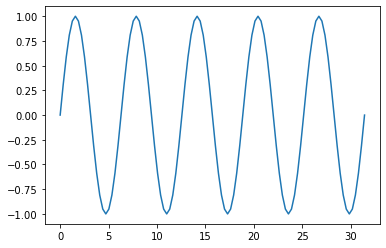

In [42]:
%%analysis_cell "../../tests/data/old_data_example"
# The name of the h5 file is sufficient if it is located in the current data_path. Otherwise, a fullpath can be provided.

if not aqm.is_old_data: # when an h5 file is specified above, then data should not be fetched anymore
    x, y = fetch_new_data()
    aqm.save_acquisition(x=x, y=y) # doesn't need to be called in the same cell as %%acquisition_cell
    # in fact, the kernel could have been restarted in the meantime (as long as x and y are retrieved somehow)

fig = plt.figure()
plt.plot(aqm.data.x, aqm.data.y)
aqm.save_fig(fig) # even with loaded data, the analysis script and figures are overwritten

## Example 4: loop

In [6]:
from quanalys.acquisition_utils import AcquisitionLoop

In [9]:
%%acquisition_cell

aqm.aq.x_loop = loop = AcquisitionLoop()
for i in loop(1, 10, .5):
    loop(x=i, y=i**2)


analysis_cell


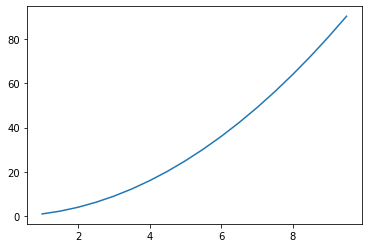

In [13]:
%%analysis_cell

plt.figure()
plt.plot(aqm.data.x_loop.x, aqm.data.x_loop.y)
plt.show()